In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'titanic.csv',index_col ='PassengerId')

In [3]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [4]:
df =df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [5]:
df['Sex'] = df['Sex'].map({'male' : 0 , 'female' :1})

In [6]:
print(df.head())

             Pclass  Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         0
2                 1    1  38.0      1      0  71.2833         1
3                 3    1  26.0      0      0   7.9250         1
4                 1    1  35.0      1      0  53.1000         1
5                 3    0  35.0      0      0   8.0500         0


In [7]:
df = df.dropna()

In [8]:
df.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         0
2                 1    1  38.0      1      0  71.2833         1
3                 3    1  26.0      0      0   7.9250         1
4                 1    1  35.0      1      0  53.1000         1
5                 3    0  35.0      0      0   8.0500         0

In [9]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 1)

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_predict)

0.8268156424581006

In [14]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns =['Predicted Not Survival','Predicted Survival'],
    index =['True Not Survival', 'True  Survival']
)

Predicted Not Survival  Predicted Survival
True Not Survival                      97                  15
True  Survival                         16                  51

In [15]:
dot_data = tree.export_graphviz(model,
                               feature_names = X.columns,
                               out_file='tree.dot',
                               filled=True,
                               rounded=True)

In [16]:
dot -Tpng tree.d!ot > tree.png

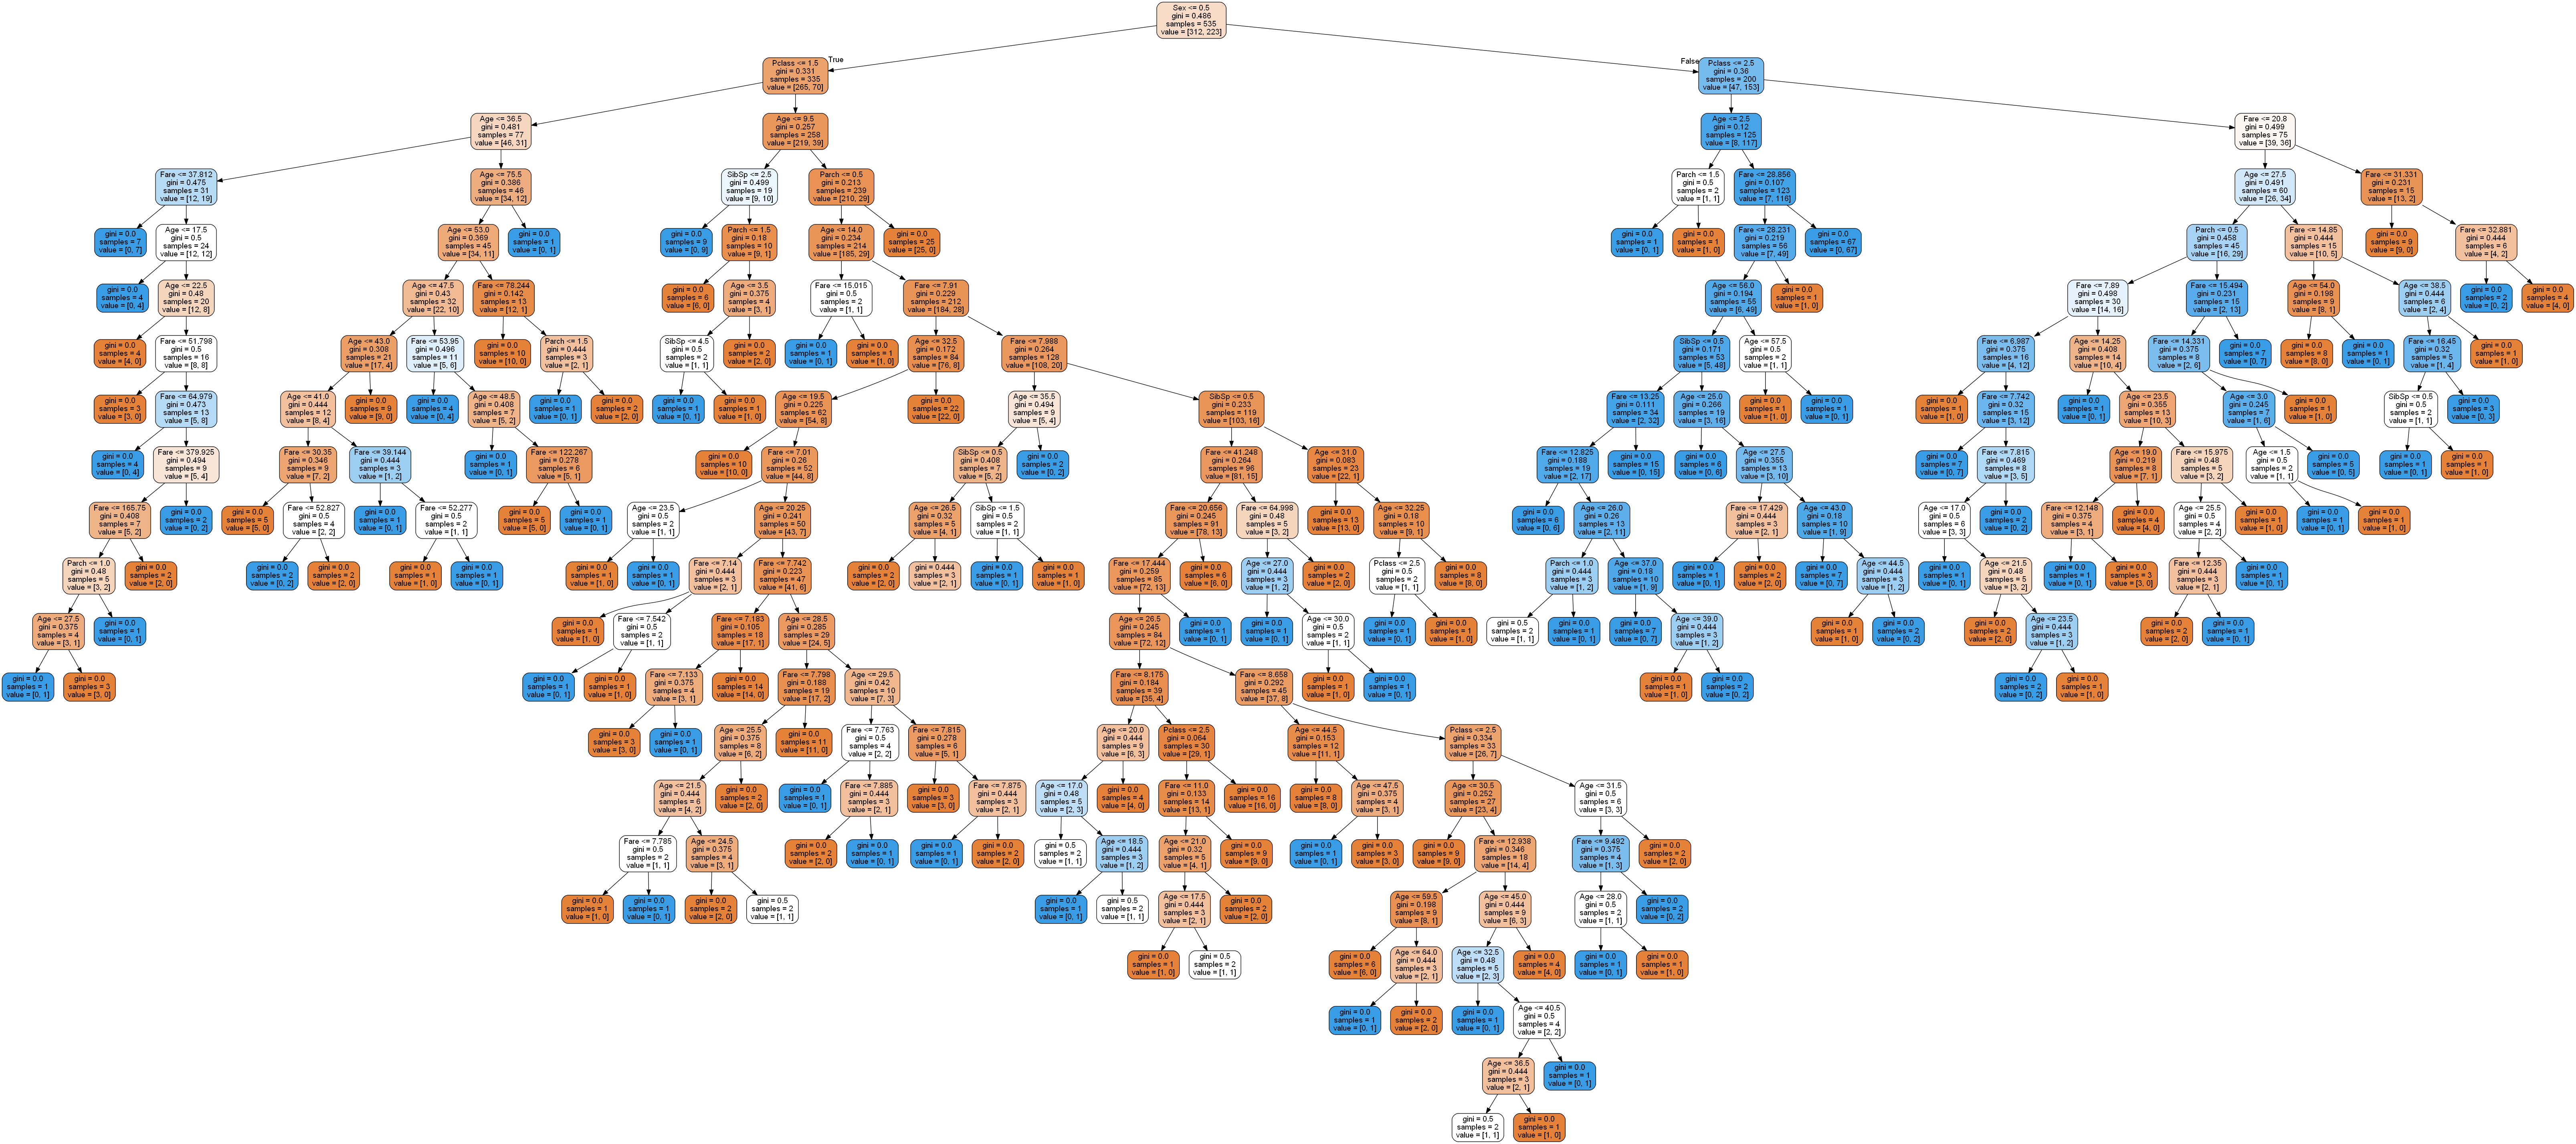

In [17]:
from IPython.display import Image
Image(filename = 'tree.png')

In [18]:
model0 = tree.DecisionTreeClassifier()
model0.fit(X,y)

y_predict = model0.predict(X)
accuracy_score(y, y_predict)

0.9859943977591037

In [19]:
dot_data = tree.export_graphviz(model0,
                               feature_names = X.columns,
                               out_file='tree.dot0',
                               filled=True,
                               rounded=True)

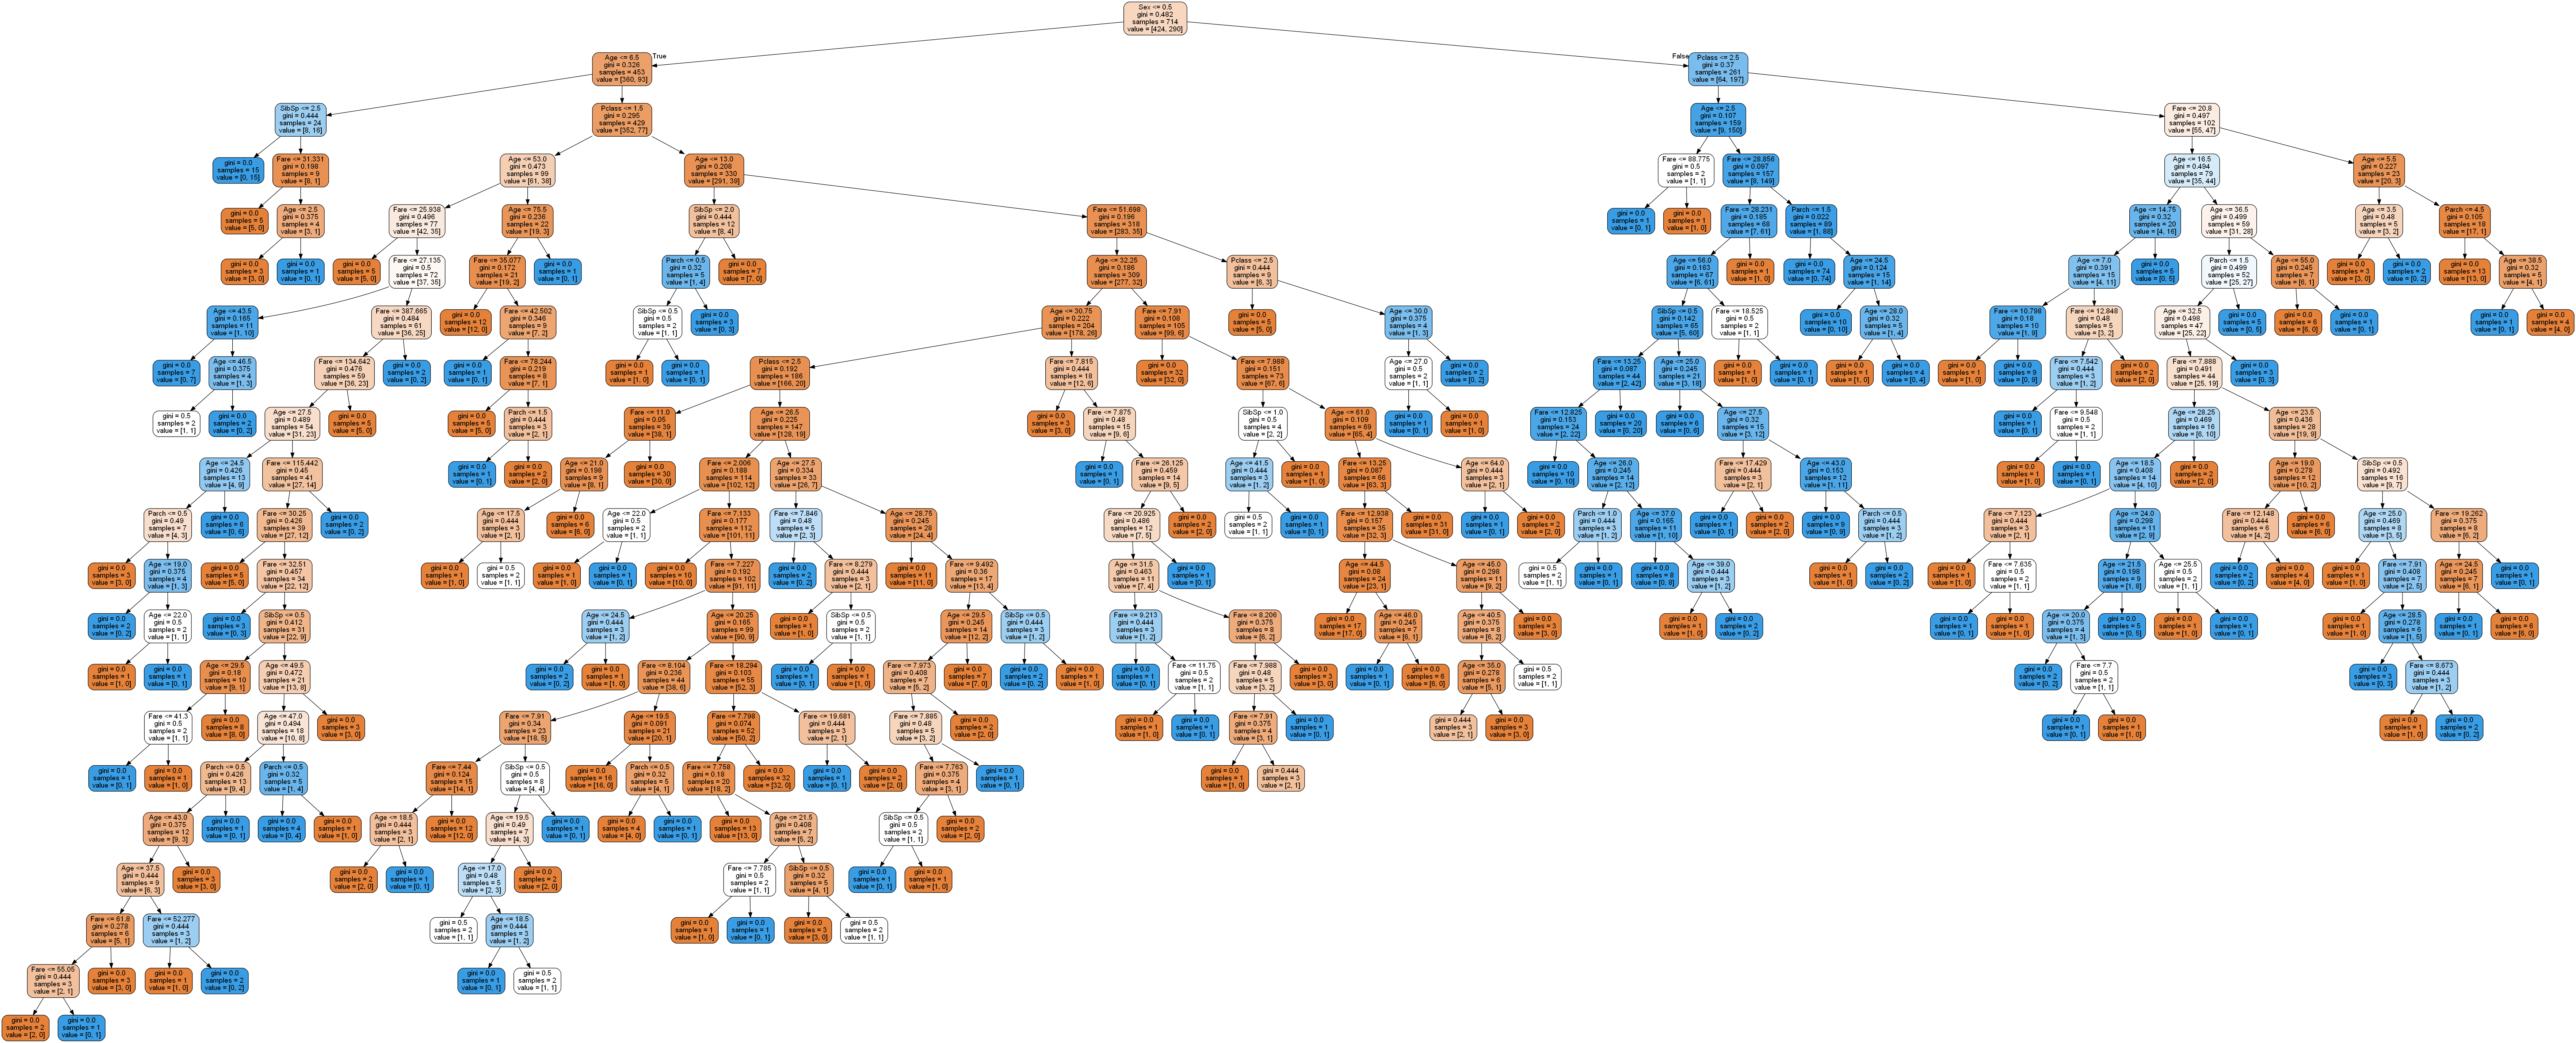

In [20]:
!dot -Tpng tree.dot0 > tree.png
from IPython.display import Image
Image(filename = 'tree.png')

In [21]:
model = tree.DecisionTreeClassifier(max_depth = 5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test , y_predict))
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns =['Predicted Not Survival','Predicted Survival'],
    index =['True Not Survival', 'True  Survival']
)



0.8547486033519553


Predicted Not Survival  Predicted Survival
True Not Survival                     102                  10
True  Survival                         16                  51

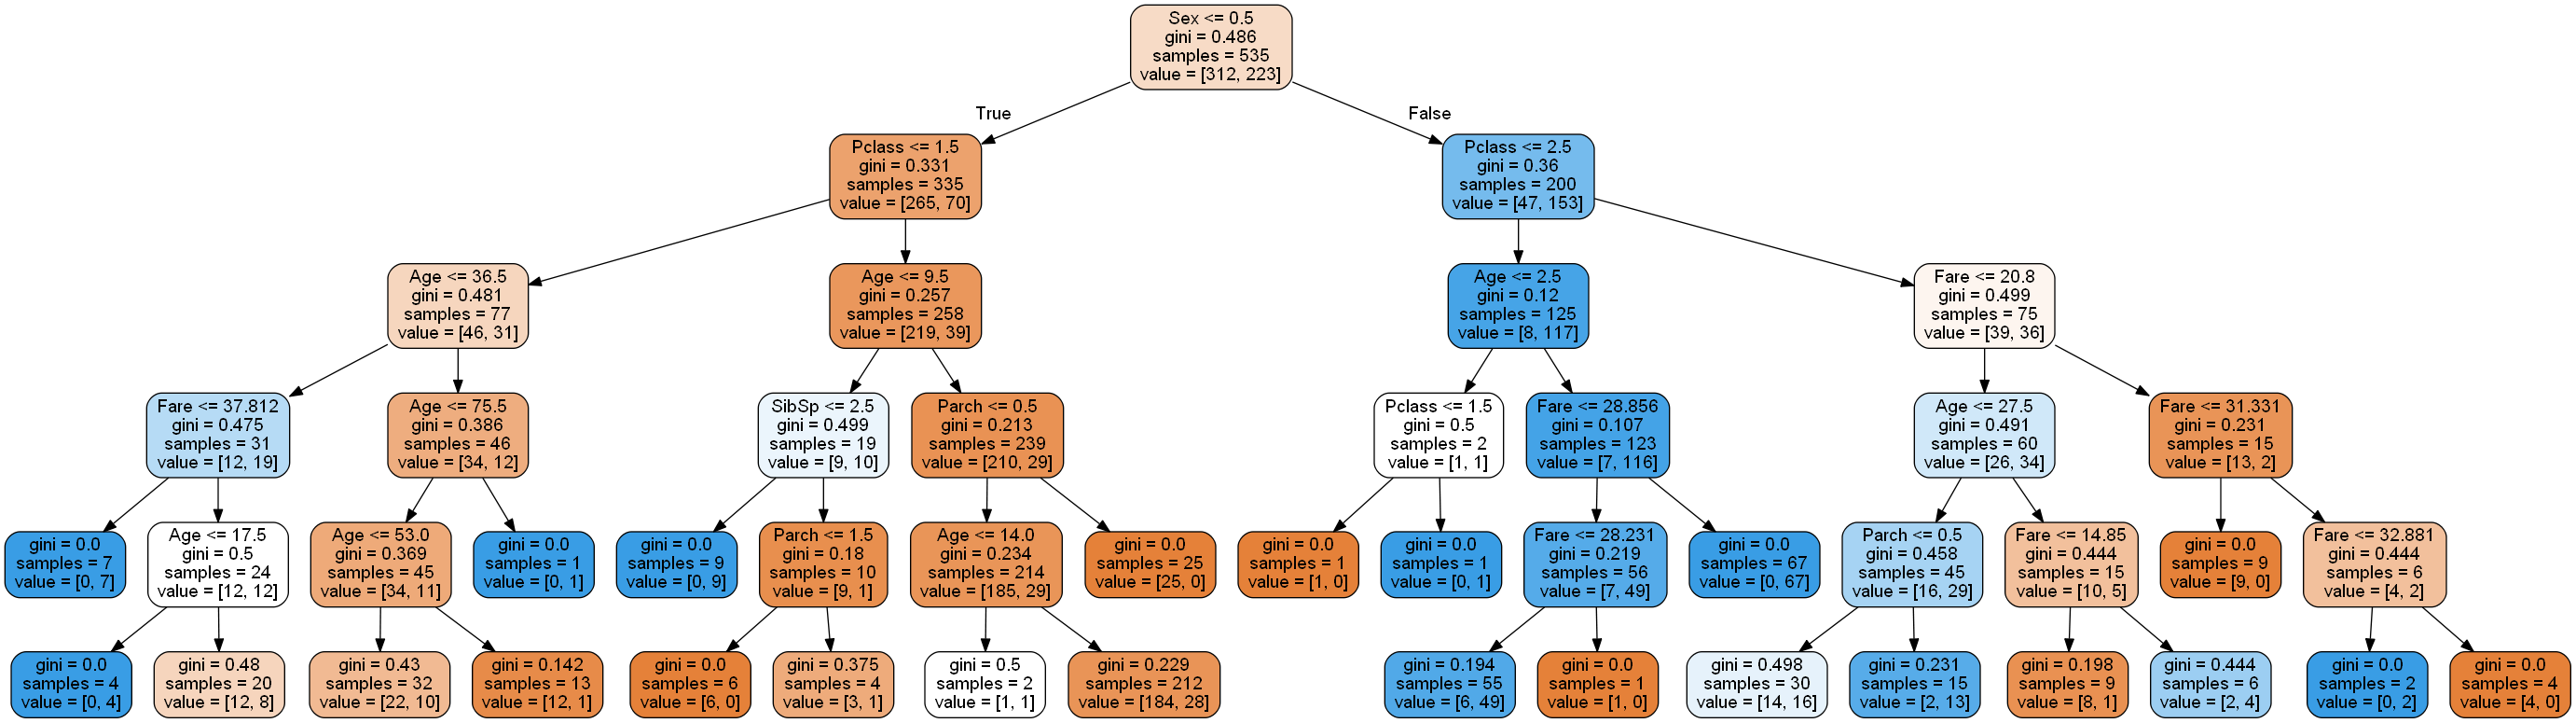

In [22]:
dot_data = tree.export_graphviz(model,
                               feature_names = X.columns,
                               out_file='tree.dot',
                               filled=True,
                               rounded=True)

!dot -Tpng tree.dot > tree.png
from IPython.display import Image
Image(filename = 'tree.png')

In [23]:
model1 = tree.DecisionTreeClassifier(max_leaf_nodes= 6)
model1.fit(X_train,y_train)
y_predict = model1.predict(X_test)
print(accuracy_score(y_test , y_predict))
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns =['Predicted Not Survival','Predicted Survival'],
    index =['True Not Survival', 'True  Survival']
)

0.8435754189944135


Predicted Not Survival  Predicted Survival
True Not Survival                     111                   1
True  Survival                         27                  40

In [24]:
y_predict_prob = model1.predict_proba(X_test)
print(y_predict_prob[:5])
print(y_predict[:5])

[[0.064      0.936     ]
 [0.9        0.1       ]
 [0.064      0.936     ]
 [0.064      0.936     ]
 [0.87866109 0.12133891]]
[1 0 1 1 0]


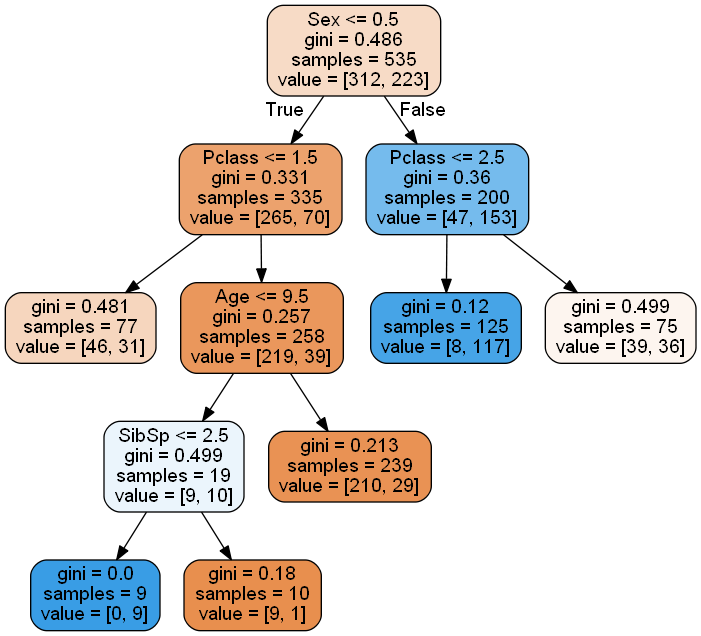

In [26]:
dot_data = tree.export_graphviz(model1,
                               feature_names = X.columns,
                               out_file='tree1.dot',
                               filled=True,
                               rounded=True)

!dot -Tpng tree1.dot > tree1.png
from IPython.display import Image
Image(filename = 'tree1.png')

In [28]:
model2 = tree.DecisionTreeClassifier(max_depth = 3,max_leaf_nodes= 7,min_samples_leaf = 20)
model2.fit(X_train,y_train)
y_predict = model2.predict(X_test)
print(accuracy_score(y_test , y_predict))
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns =['Predicted Not Survival','Predicted Survival'],
    index =['True Not Survival', 'True  Survival']
)

0.7877094972067039


Predicted Not Survival  Predicted Survival
True Not Survival                      96                  16
True  Survival                         22                  45

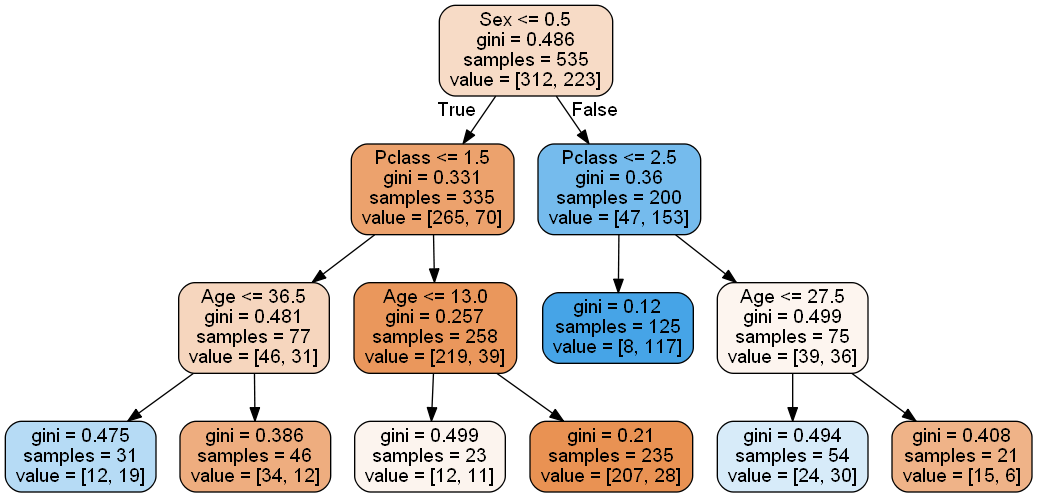

In [29]:
dot_data = tree.export_graphviz(model2,
                               feature_names = X.columns,
                               out_file='tree2.dot',
                               filled=True,
                               rounded=True)

!dot -Tpng tree2.dot > tree2.png
from IPython.display import Image
Image(filename = 'tree2.png')

In [30]:
print('hello')

hello


0.7932960893854749


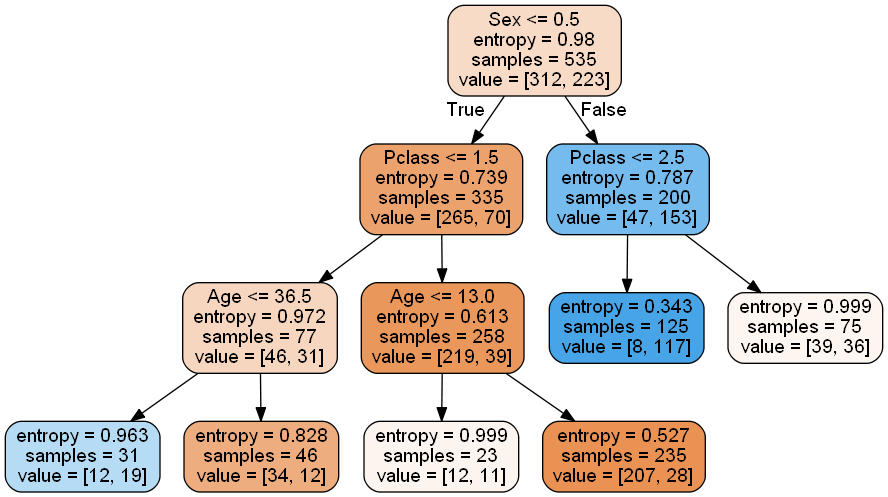

In [32]:
model1 = tree.DecisionTreeClassifier(criterion ='entropy' , max_depth = 3 , max_leaf_nodes = 6 , min_samples_leaf = 20)
model1.fit(X_train,y_train)
y_predict = model1.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_predict))


dot_data = tree.export_graphviz(model1,
                               feature_names = X.columns,
                               out_file='tree3.dot',
                               filled=True,
                               rounded=True)

!dot -Tpng tree3.dot > tree3.png
from IPython.display import Image
Image(filename = 'tree3.png')











In [33]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X , y , random_state = 1)


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 25,
                              random_state = 1)

In [34]:
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test , y_predict))
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns =['Predicted Not Survival','Predicted Survival'],
    index =['True Not Survival', 'True  Survival']
)

0.8379888268156425


Predicted Not Survival  Predicted Survival
True Not Survival                     101                  11
True  Survival                         18                  49

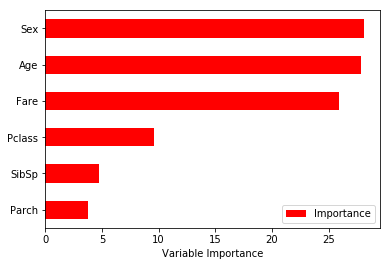

In [36]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100},index = X_train.columns)
Importance.sort_values('Importance' , axis = 0 ,ascending = True).plot(kind ='barh' , color = 'r')
plt.xlabel('Variable Importance')
plt.gca().Legend_ = None 

In [39]:
X = df[['Sex' , 'Age' , 'Fare']]
y = df['Survived']
from sklearn.model_selection import train_test_split
X_train , X_test , y_test , y_test = train_test_split(X , y , random_state = 1)

model = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 25,
                              random_state = 10)


model.fit(X_train , y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test , y_predict))











0.776536312849162
